In [1]:
import csv
import pandas as pd
import trackpy as tp
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import stats

In [2]:
"""Insert parameters here."""

frames2secs = 1/80
pix2micron = 1.21
data_file = 'D:/LC Lab/SVM-Droplet-Tracking/islandCenters.csv'


In [3]:
"""Extract the data from the specific file and store them in the dataframe."""

# data = open(data_file)
# x,y = [], []
# for l in data:
#     row = l.split()
#     x.append(float(row[0]))
#     y.append(float(row[1]))
# frames=range(0,len(x),1)
# partic = np.zeros((1,len(x)),dtype=float)
# partic=partic[0]
# # print(partic)
# df = pd.DataFrame(data={'particle':partic,'frame':frames,'x':x,'y':y})
# # data.set_index('frame')
data = pd.read_csv('D:/LC Lab/SVM-Droplet-Tracking/islandCenters.csv')
data = data.drop_duplicates()
data = data.reset_index()
# df = pd.DataFrame()
# for i in range(100):
#     dataTemp = data[data['frame'] == i]
#     df = df.append(dataTemp)
df = pd.DataFrame(data)
df.reset_index()
print(df)
        


       index    x    y  radius  frame
0          0  418  597   83.50      0
1          2  659  414   64.75      0
2          4  450  371   93.75      0
3          6  608  210   51.50      0
4          8  769  147   87.50      0
...      ...  ...  ...     ...    ...
15478  29116  687  201  143.75   1342
15479  29118  764  112   88.25   1342
15480  29120  539  118  104.75   1342
15481  29122  781   44   47.75   1342
15482  29124  559   26  147.00   1342

[15483 rows x 5 columns]


Frame 1342: 12 trajectories present.
       index    x    y  radius  frame  particle
frame                                          
46       871  528  114  103.75     46        24
46       869  754  108   87.00     46        23
46       868  678  196  143.25     46        26
46       866  585  170   51.00     46        25
46       864  909  228   63.50     46        27
...      ...  ...  ...     ...    ...       ...
1342   29114  594  175   51.00   1342        25
1342   29116  687  201  143.75   1342        26
1342   29118  764  112   88.25   1342        23
1342   29120  539  118  104.75   1342        24
1342   29124  559   26  147.00   1342        35

[14360 rows x 6 columns]


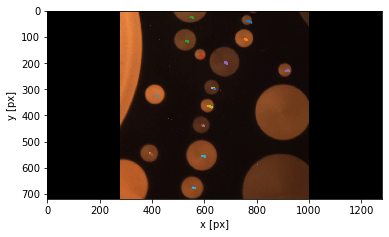

25


,index,x,y,radius,frame,particle
frame,,,,,,
46,871,528,114,103.75,46,24
47,891,528,114,103.75,47,24
48,913,528,114,105.00,48,24
49,937,528,114,103.75,49,24
50,961,528,113,104.75,50,24
...,...,...,...,...,...,...
1337,29018,539,118,104.75,1337,24
1339,29057,539,118,104.75,1339,24
1340,29081,538,118,103.75,1340,24


In [4]:
search_range = 7
background = cv2.imread('D:/Senior Year/Honors Thesis Tracking Videos/TrimmedIslands/img_50.tif')
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

t = tp.link_df(df, search_range, memory=10, link_strategy='numba')
t = tp.filter_stubs(t, 150)
print(t)

r = tp.plot_traj(t, superimpose=background)

particles = t['particle']
indexMode = stats.mode(particles)
indexMode = indexMode[0]
indexMode = indexMode[0]
print(indexMode)

indexMode = 24

df = t.loc[t['particle']==indexMode]
df

In [5]:
# """Compute the significant results which are the delta-x, delta-y, displacement of a particle."""

distancedata = []
deltaxdata= []
deltaydata = []

df = df.reset_index(drop=True)

for i in range(len(df)):
    
    if i == 0:
        distancedata.append(0)
        deltaxdata.append(0)
        deltaydata.append(0)
    else:
    
        x1 = df['x'].iloc[i]
        y1 = df['y'].iloc[i]
        x2 = df['x'].iloc[i-1]
        y2 = df['y'].iloc[i-1]

        deltax = x1-x2
        deltay = y1-y2
    
        distance = np.sqrt(np.power(x1-x2,2)+np.power(y1-y2,2))

        distancedata.append(distance)
        
        deltaxdata.append(deltax)
        deltaydata.append(deltay)



df['displacement-micron'] = distancedata
df['deltax-micron'] = deltaxdata
df['deltay-micron'] = deltaydata

print(df)

      index    x    y  radius  frame  particle  displacement-micron  \
0       871  528  114  103.75     46        24                  0.0   
1       891  528  114  103.75     47        24                  0.0   
2       913  528  114  105.00     48        24                  0.0   
3       937  528  114  103.75     49        24                  0.0   
4       961  528  113  104.75     50        24                  1.0   
...     ...  ...  ...     ...    ...       ...                  ...   
1069  29018  539  118  104.75   1337        24                  0.0   
1070  29057  539  118  104.75   1339        24                  0.0   
1071  29081  538  118  103.75   1340        24                  1.0   
1072  29098  539  118  104.75   1341        24                  1.0   
1073  29120  539  118  104.75   1342        24                  0.0   

      deltax-micron  deltay-micron  
0                 0              0  
1                 0              0  
2                 0              0  

In [6]:
"""Plot the trajectory of randomwalk which has starting point on green dot and end point on red dot."""

# width, height = -25, -10

# search_range = 10

# # t = tp.link_df(df, search_range)

# fig, ax = plt.subplots()
# ax.set_title('Trajectory of randomwalk')
# ax.set_xlim([-10, 25])
# ax.set_ylim([-15, 10])
# ax.plot(df['x'], df['y'], 'black')
# ax.plot(df['x'].iloc[0], df['y'].iloc[0],'og')
# ax.plot(df['x'].iloc[-1], df['y'].iloc[-1], 'or')
# # tp.plot_traj(t, ax=ax)


'Plot the trajectory of randomwalk which has starting point on green dot and end point on red dot.'

Diffusion coefficient = 0.5856594260695356 (micron-sqd) / (sec)
slope =  2.3426377042781423 (micron-sqd) / (sec)


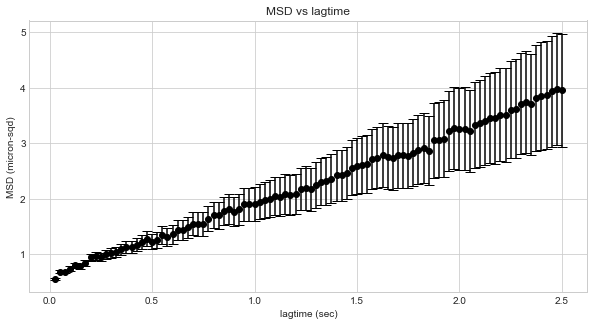

In [7]:
"""Plot the linear line of Mean-squared distance vs lagtime."""

from pylab import *
from scipy.optimize import curve_fit
plt.style.use('seaborn-whitegrid')
mpl.rc('figure',  figsize=(10, 5))

ylabel = '(micron-sqd)'
xlabel = '(sec)'
#Calculate the mean square distance (msd) and show the plot of msd versus lagtime
def linearFunc(x,slope):
    y = slope * x
    return y

max_lagtime = 100
w = []          #Stored uncertainty
msdcal = tp.msd(df, mpp=pix2micron, fps=40, max_lagtime=max_lagtime, detail=True)


x = msdcal['lagt']
y = msdcal['msd']


fig, ax = plt.subplots()
ax.set_title('MSD vs lagtime')
ax.set_ylabel(f'MSD {ylabel}')
ax.set_xlabel(f'lagtime {xlabel}')



for num in range(0,max_lagtime):
     weight = msdcal['msd'].iloc[num]/np.sqrt(msdcal['N'].iloc[num])
     w.append(weight)

msdcal['weight'] = w
noise = msdcal['weight']

a_fit,cov=curve_fit(linearFunc,x,y,sigma=noise,absolute_sigma=True)

slope = a_fit[0]



yfit = slope*x
ax.errorbar(x, y,
             yerr = w,
             fmt='ok', color='green', 
             errorevery=1, 
             alpha=1, 
 
             capsize = 5)

# ax.plot(x, yfit, '--k')

print('Diffusion coefficient =', slope/4, ylabel, '/', xlabel)
print('slope = ', slope, ylabel, '/', xlabel)

<ErrorbarContainer object of 3 artists>

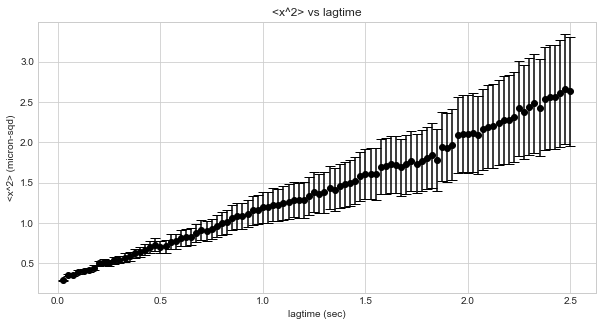

In [8]:
x1 = msdcal['lagt']
y1 = msdcal['<x^2>']
w1 = [] 


fig, ax = plt.subplots()
ax.set_title('<x^2> vs lagtime')
ax.set_ylabel(f'<x^2> {ylabel}')
ax.set_xlabel(f'lagtime {xlabel}')



for num in range(0,max_lagtime):
     weight = msdcal['<x^2>'].iloc[num]/np.sqrt(msdcal['N'].iloc[num])
     w1.append(weight)

msdcal['weight'] = w1
noise = msdcal['weight']

yfit = slope*x
ax.errorbar(x1, y1,
             yerr = w1,
             fmt='ok', color='green', 
             errorevery=1, 
             alpha=1, 
 
             capsize = 5)


<ErrorbarContainer object of 3 artists>

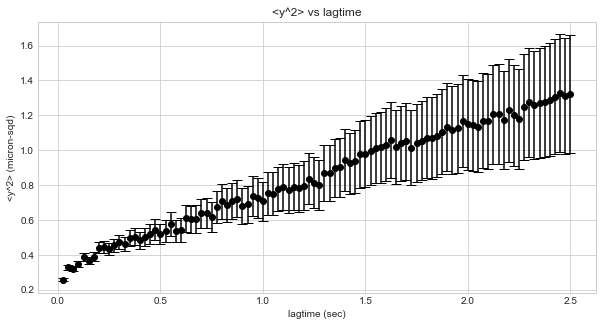

In [9]:
x2 = msdcal['lagt']
y2 = msdcal['<y^2>']
w2 = [] 


fig, ax = plt.subplots()
ax.set_title('<y^2> vs lagtime')
ax.set_ylabel(f'<y^2> {ylabel}')
ax.set_xlabel(f'lagtime {xlabel}')



for num in range(0,max_lagtime):
     weight = msdcal['<y^2>'].iloc[num]/np.sqrt(msdcal['N'].iloc[num])
     w2.append(weight)

msdcal['weight'] = w2
noise = msdcal['weight']

ax.errorbar(x2, y2,
             yerr = w2,
             fmt='ok', color='green', 
             errorevery=1, 
             alpha=1, 
 
             capsize = 5)

In [10]:
msdcal

,<x>,<y>,<x^2>,<y^2>,msd,N,lagt,weight
lagt,,,,,,,,
1,0.014515,0.002639,0.288988,0.258652,0.547640,1073.171935,0.025,0.007896
2,0.024066,0.004011,0.349443,0.328411,0.677854,715.079975,0.050,0.012281
3,0.026711,0.013355,0.358753,0.319969,0.678722,507.807971,0.075,0.014199
4,0.032777,0.013657,0.389986,0.347021,0.737007,389.614930,0.100,0.017581
5,0.036915,0.019141,0.408625,0.387118,0.795742,314.951399,0.125,0.021813
...,...,...,...,...,...,...,...,...
96,0.924428,0.350341,2.561284,1.289548,3.850832,15.855096,2.400,0.323857
97,0.935674,0.345502,2.556792,1.308001,3.864793,15.682194,2.425,0.330297
98,0.962668,0.352485,2.605632,1.329697,3.935329,15.512822,2.450,0.337604


In [11]:
df

,index,x,y,radius,frame,particle,displacement-micron,deltax-micron,deltay-micron
0,871,528,114,103.75,46,24,0.0,0,0
1,891,528,114,103.75,47,24,0.0,0,0
2,913,528,114,105.00,48,24,0.0,0,0
3,937,528,114,103.75,49,24,0.0,0,0
4,961,528,113,104.75,50,24,1.0,0,-1
...,...,...,...,...,...,...,...,...,...
1069,29018,539,118,104.75,1337,24,0.0,0,0
1070,29057,539,118,104.75,1339,24,0.0,0,0
1071,29081,538,118,103.75,1340,24,1.0,-1,0
1072,29098,539,118,104.75,1341,24,1.0,1,0


In [12]:
"""Plot the Gaussian distribution of delta-x """

from scipy.optimize import curve_fit


xplot = 'deltax-micron'        #Insert the x-axis plot data here
x_data=df[xplot]
bins = 200

hist, bin_edges = np.histogram(x_data, bins=bins)
hist=hist/sum(hist)


n = len(hist)
x_hist=np.zeros((n),dtype=float) 
for ii in range(n):
    x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    
y_hist=hist


#Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gauss(x, A, B, C):
    return A * np.exp(-(x-B) ** 2 / (2 * C ** 2))

B = sum(x_hist*y_hist)/sum(y_hist)       
C = np.sqrt(sum(y_hist*(x_hist-B)**2)/sum(y_hist)) 


#Gaussian least-square fitting process
param_optimised,param_covariance_matrix = curve_fit(gauss,x_hist,y_hist,p0=[min(y_hist), max(y_hist), C])


fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gauss(x_hist_2,*param_optimised),'--', color='crimson',label='Gaussian fit')
plt.legend()


#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, weights=weights, color='slateblue', bins=bins)


plt.xlabel(f'{xplot}')
plt.ylabel("Probability")
plt.grid("on")
plt.show()

print("A =", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
print("B =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
print("C =", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))

print("Diffusion coefficient =", np.power(param_optimised[2],2)/(2*frames2secs), 'micron-sqd/sec')

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

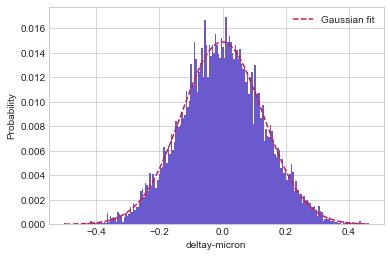

A = 0.014882750108146676 +- 0.00012619956724103354
B = -0.0012405027295847386 +- 0.001264505945891807
C = 0.12914535298409813 +- 0.0012645509770344574
Diffusion coefficient = 0.6671408878954921 micron-sqd/sec


In [ ]:
"""Plot the Gaussian distribution of delta-y""" 

from scipy.optimize import curve_fit


xplot = 'deltay-micron'        #Insert the x-axis plot data here
x_data=df[xplot]
bins = 200

hist, bin_edges = np.histogram(x_data, bins=bins)
hist=hist/sum(hist)


n = len(hist)
x_hist=np.zeros((n),dtype=float) 
for ii in range(n):
    x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    
y_hist=hist


#Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gauss(x, A, B, C):
    return A * np.exp(-(x-B) ** 2 / (2 * C ** 2))

B = sum(x_hist*y_hist)/sum(y_hist)       
C = np.sqrt(sum(y_hist*(x_hist-B)**2)/sum(y_hist)) 


#Gaussian least-square fitting process
param_optimised,param_covariance_matrix = curve_fit(gauss,x_hist,y_hist,p0=[min(y_hist), max(y_hist), C])


fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gauss(x_hist_2,*param_optimised),'--', color='crimson',label='Gaussian fit')
plt.legend()


#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, weights=weights, color='slateblue', bins=bins)


plt.xlabel(f'{xplot}')
plt.ylabel("Probability")
plt.grid("on")
plt.show()

print("A =", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
print("B =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
print("C =", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))

print("Diffusion coefficient =", np.power(param_optimised[2],2)/(2*frames2secs), 'micron-sqd/sec')

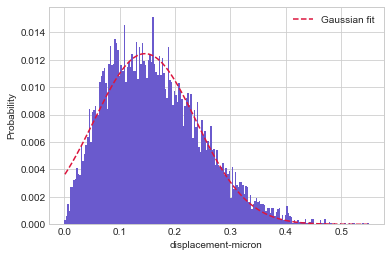

A =  0.012441809139241953 +- 0.00017282224911453745
B = 0.14576507957527024 +- 0.0015282060094610223
C = 0.09216245891511414 +- 0.0016695016849759825


In [ ]:
"""Plot the histogram of displacement of a particle"""

from scipy.optimize import curve_fit

xplot = 'displacement-micron'        #Insert the x-axis plot data here
x_data=df[xplot]
bins = 200

hist, bin_edges = np.histogram(x_data, bins=bins)
hist=hist/sum(hist)


n = len(hist)
x_hist=np.zeros((n),dtype=float) 
for ii in range(n):
    x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    
y_hist=hist


#Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gauss(x, A, B, C):
    return A * np.exp(-(x-B) ** 2 / (2 * C ** 2))

B = sum(x_hist*y_hist)/sum(y_hist)                  
C = np.sqrt(sum(y_hist*(x_hist-B)**2)/sum(y_hist)) 


#Gaussian least-square fitting process
param_optimised,param_covariance_matrix = curve_fit(gauss,x_hist,y_hist,p0=[min(y_hist), max(y_hist), C])


fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gauss(x_hist_2,*param_optimised),'--', color='crimson',label='Gaussian fit')
plt.legend()


#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, weights=weights, color='slateblue', bins=bins)


plt.xlabel(f'{xplot}')
plt.ylabel("Probability")
plt.grid("on")
plt.show()

print("A = ", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
print("B =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
print("C =", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))



In [ ]:
def HPW_mobility(x, eta, h, gamma, C1, C2, B1, B2):
    return (1 / 4*np.pi*eta*h)*(np.log(2/x) - gamma + 4*x/np.pi - x**2/2*np.log(2/x) / 1 - x**3/np.pi*(np.log(2/x)) + (C1*x**B1/1+C2*x**B2)) 

In [ ]:
"""Directly calculate the diffusion coefficent by the variance of delta-x and delta-y
(Those diffusion coefficents have only 1 dimension)"""

from statistics import variance


vx = variance(df['deltax-micron'])
Dx = vx/(2*frames2secs)

print(Dx)


vy =  variance(df['deltay-micron'])
Dy = vy/(2*frames2secs)

print(Dy)

0.6946075058662228
0.6752692123290711


In [ ]:
msd = tp.imsd(df, mpp=pix2micron, fps=1/frames2secs, max_lagtime=max_lagtime)

In [ ]:
motion_msd = tp.motion.msd(df, mpp=pix2micron, fps=1/frames2secs, max_lagtime=max_lagtime, detail=True)

In [ ]:
import xlsxwriter
import os.path

#Create an excel file and store every data in features dataframe.

if os.path.exists('output1.xlsx'):
    os.remove('output1.xlsx')

motion_msd.to_excel('tp.motion.msd.xlsx', engine='xlsxwriter')

ModuleNotFoundError: No module named 'xlsxwriter'

In [ ]:
motion_msd

,<x>,<y>,<x^2>,<y^2>,msd,N,lagt
lagt,,,,,,,
1,0.116989,-0.076440,2.130109,2.068516,4.198626,9920.634921,0.0125
2,0.246631,-0.137435,4.053665,3.501579,7.555244,6578.530783,0.0250
3,0.380148,-0.196389,5.860010,4.518537,10.378547,4647.926267,0.0375
4,0.491705,-0.260413,7.471976,5.510193,12.982170,3547.356881,0.0500
5,0.593125,-0.313908,9.637617,7.160458,16.798074,2852.194715,0.0625
...,...,...,...,...,...,...,...
96,13.977709,2.479237,208.106257,23.584534,231.690791,98.205135,1.2000
97,13.880362,2.255836,206.805670,21.385247,228.190917,97.284536,1.2125
98,13.609064,1.904885,198.919929,20.921670,219.841598,96.392314,1.2250
